CONTEXT: A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can
analyse all relevant customer data and develop focused customer retention programs.

## Import Libraries

In [1]:

%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import  recall_score, roc_auc_score, precision_score

from sklearn import model_selection
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

## Load and review data

In [2]:
df = pd.read_csv("TelcomCustomer-Churn.csv")  
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


total charges is a numerical feature but has datatype as object, so we will change its data type.

In [5]:
df.drop(columns="customerID",inplace=True) #not important

In [6]:
df["TotalCharges"].apply(type)

0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
7038    <class 'str'>
7039    <class 'str'>
7040    <class 'str'>
7041    <class 'str'>
7042    <class 'str'>
Name: TotalCharges, Length: 7043, dtype: object

In [7]:
#df["TotalCharges"].astype(float)
df["TotalCharges"]=df["TotalCharges"].map(pd.eval)

In [8]:
df["TotalCharges"].apply(type)

0       <class 'float'>
1       <class 'float'>
2       <class 'float'>
3       <class 'float'>
4       <class 'float'>
             ...       
7038    <class 'float'>
7039    <class 'float'>
7040    <class 'float'>
7041    <class 'float'>
7042    <class 'float'>
Name: TotalCharges, Length: 7043, dtype: object

In [9]:
df['TotalCharges'].isnull().sum()

11

In [10]:
df['tenure'].isin([0]).sum()

11

In [11]:
print(df[df['tenure'].isin([0])].index)
print(df[df['TotalCharges'].isna()].index)

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')
Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')


Therefore total charges and tenure are zero for same customers. So we will replace nan with 0.

In [12]:
df.loc[:,'TotalCharges'] = df.loc[:,'TotalCharges'].replace(np.nan,0)
df['TotalCharges'].isnull().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [14]:
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   int64   
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod     7043 n

In [16]:
df["SeniorCitizen"] = pd.Categorical(df["SeniorCitizen"])

In [17]:
df["SeniorCitizen"].isnull().sum()

0

In [18]:
df


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [19]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [20]:
la=list(df)

In [21]:
la

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [22]:
l=[]
for c in df.columns:
    # Loop through all columns in the dataframe
    
    if str(df[c].dtype) == 'category':
        l.append(c)
print(l)       

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [23]:

li = list(set(la) - set(l))


In [24]:
li

['tenure', 'TotalCharges', 'MonthlyCharges']

In [25]:
li[1]

'TotalCharges'

# Data analysis & visualisation

# Univariate analysis

Numeric features

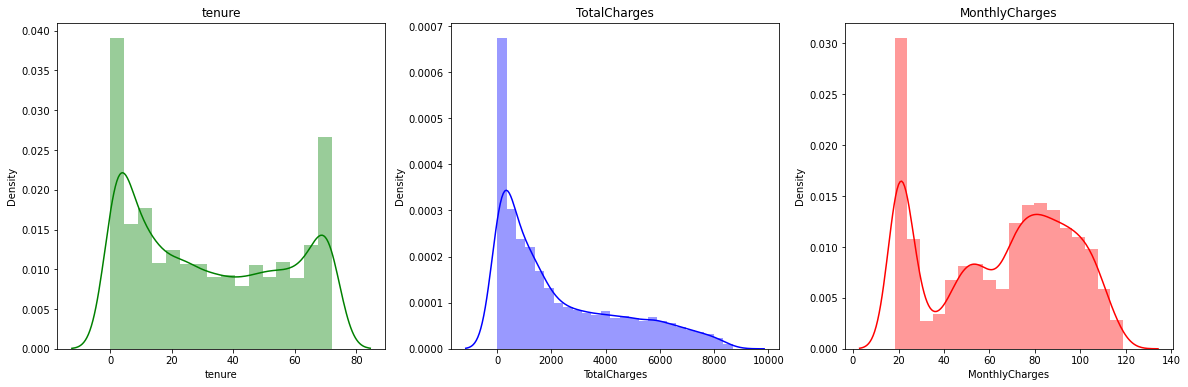

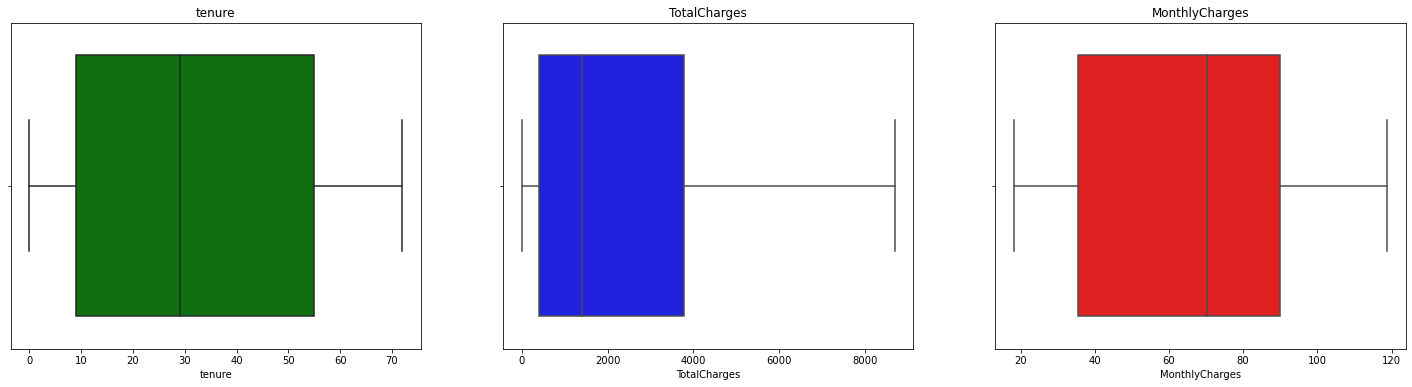

In [26]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title(li[0])
sns.distplot(df[li[0]],color='green')


plt.subplot(1, 3, 2)
plt.title(li[1])
sns.distplot(df[li[1]],color='blue')


plt.subplot(1, 3, 3)
plt.title(li[2])
sns.distplot(df[li[2]],color='red')


plt.figure(figsize=(25,6))
plt.subplot(1, 3, 1)
plt.title(li[0])
sns.boxplot(df[li[0]],color='green')


plt.subplot(1, 3, 2)
plt.title(li[1])
sns.boxplot(df[li[1]],color='blue')


plt.subplot(1, 3, 3)
plt.title(li[2])
sns.boxplot(df[li[2]],color='red')

plt.show()

 For all numeric features there is no outliers. The distribution is not normal.
 
 

Distribution of categorical variables

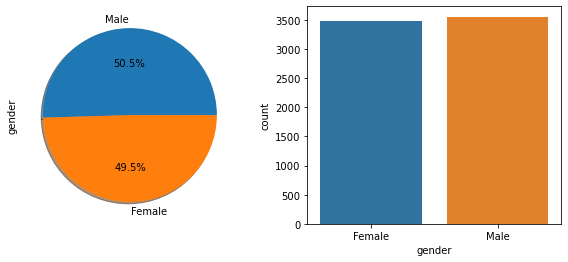

In [27]:
f,axes=plt.subplots(1,2,figsize=(10,4))
df[l[0]].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot(l[0],data=df,ax=axes[1])
plt.show()

Total number of males and females are almost same.

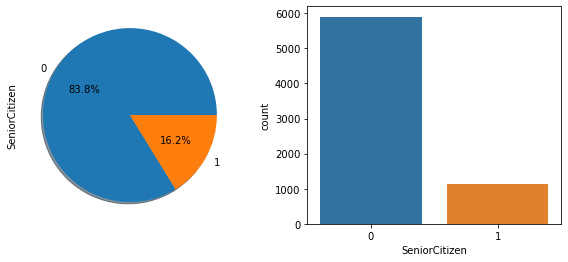

In [28]:
f,axes=plt.subplots(1,2,figsize=(10,4))
df[l[1]].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot(l[1],data=df,ax=axes[1])
plt.show()

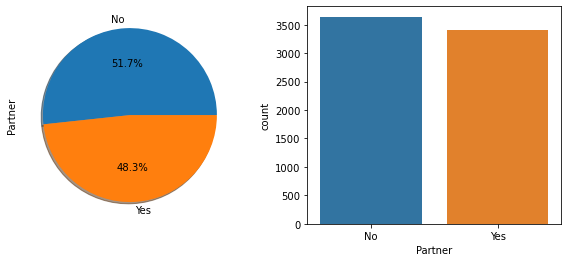

In [29]:
f,axes=plt.subplots(1,2,figsize=(10,4))
df[l[2]].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot(l[2],data=df,ax=axes[1])
plt.show()

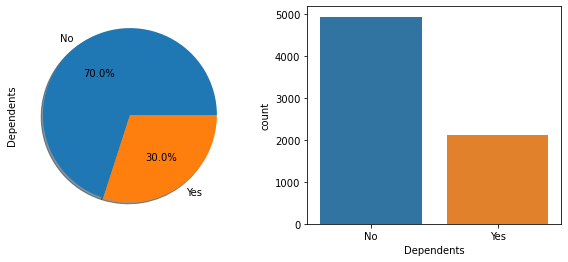

In [30]:
f,axes=plt.subplots(1,2,figsize=(10,4))
df[l[3]].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot(l[3],data=df,ax=axes[1])
plt.show()

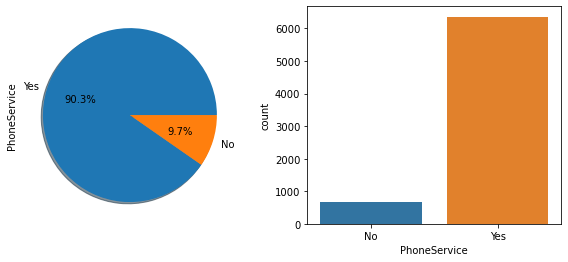

In [31]:
f,axes=plt.subplots(1,2,figsize=(10,4))
df[l[4]].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot(l[4],data=df,ax=axes[1])
plt.show()

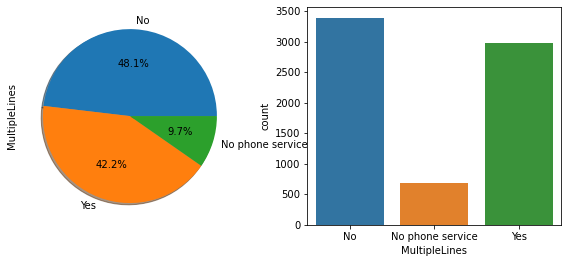

In [32]:
f,axes=plt.subplots(1,2,figsize=(10,4))
df[l[5]].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0],shadow=True)
sns.countplot(l[5],data=df,ax=axes[1])
plt.show()

# Bivariate analysis

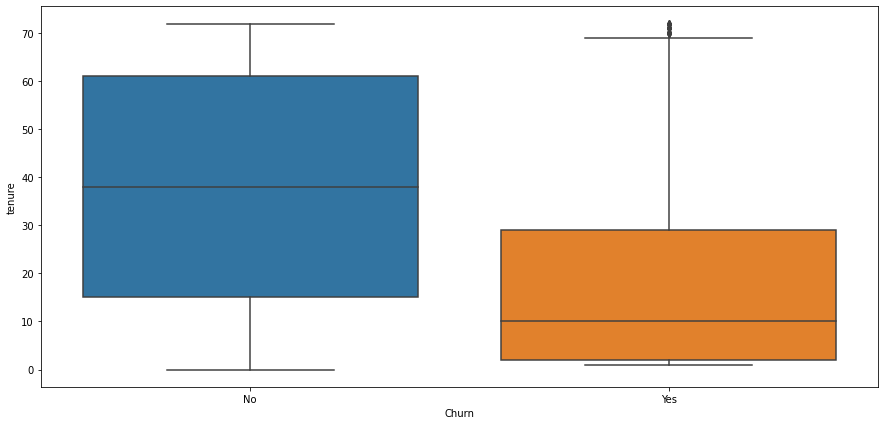

In [33]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Churn', y=li[0], data= df)
plt.show()

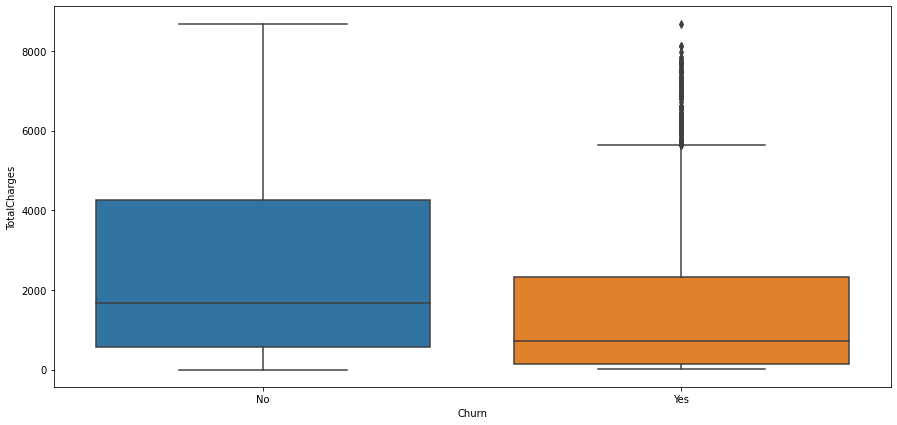

In [34]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Churn', y=li[1], data= df)
plt.show()

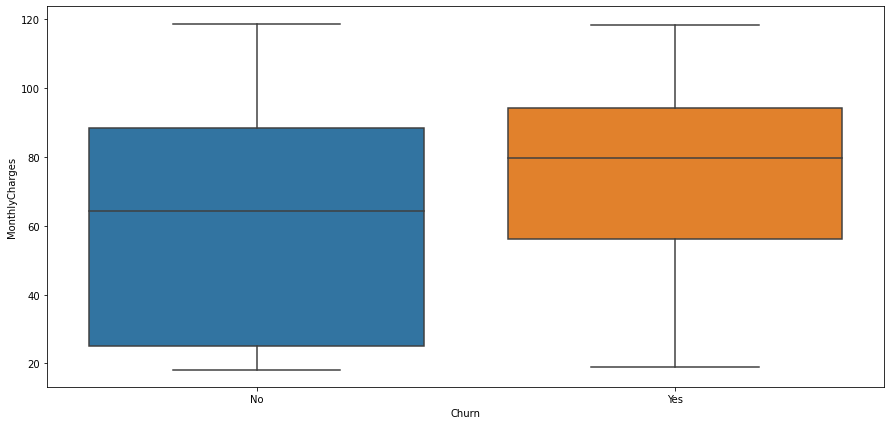

In [35]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Churn', y=li[2], data= df)
plt.show()

<AxesSubplot:xlabel='gender', ylabel='count'>

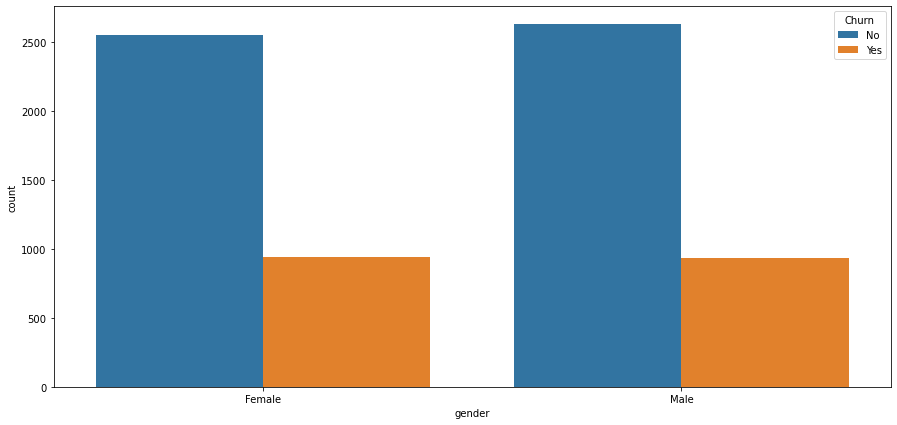

In [36]:
plt.figure(figsize=(15,7))
sns.countplot(df[l[0]],hue=df['Churn'])

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

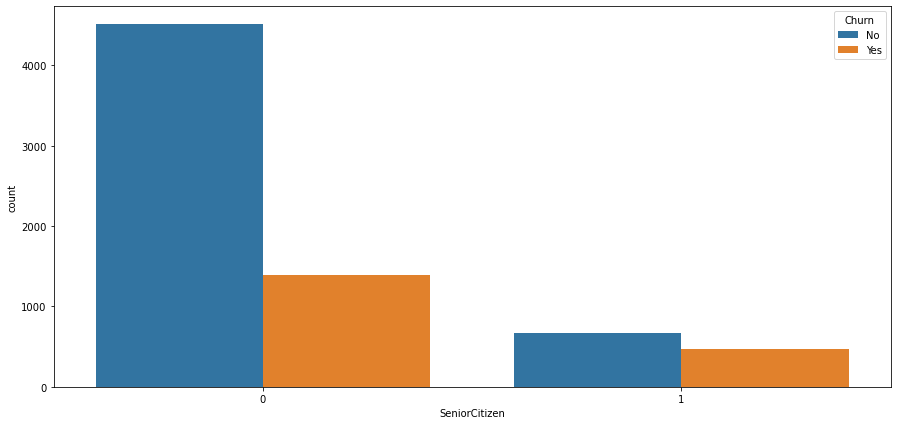

In [37]:
plt.figure(figsize=(15,7))
sns.countplot(df[l[1]],hue=df['Churn'])

<AxesSubplot:xlabel='Partner', ylabel='count'>

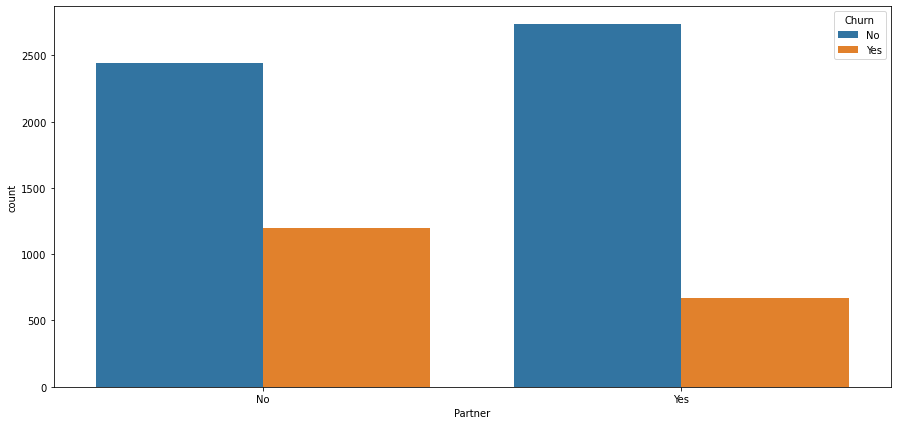

In [38]:
plt.figure(figsize=(15,7))
sns.countplot(df[l[2]],hue=df['Churn'])

<AxesSubplot:xlabel='Dependents', ylabel='count'>

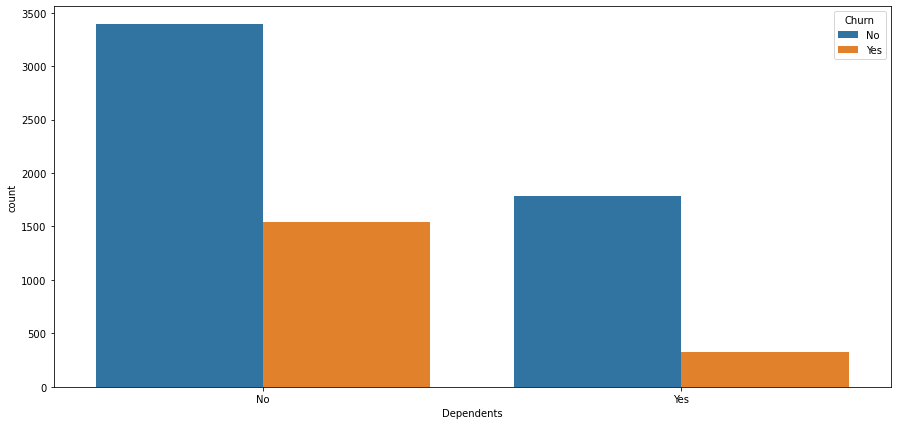

In [39]:
plt.figure(figsize=(15,7))
sns.countplot(df[l[3]],hue=df['Churn'])

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

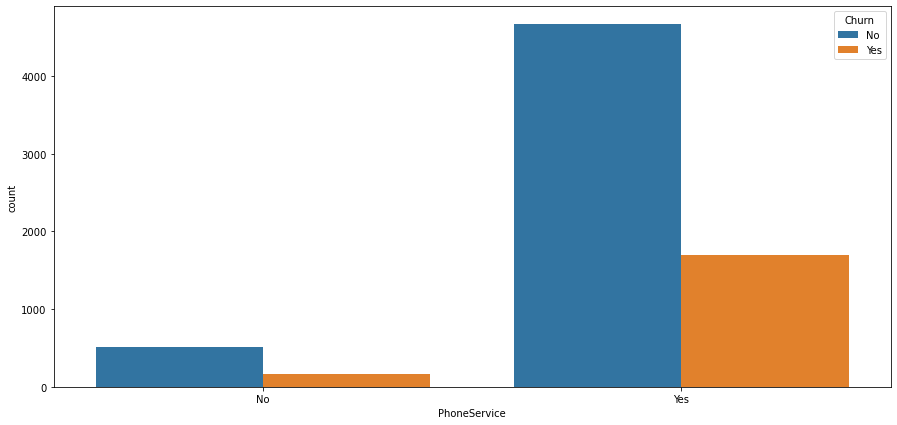

In [40]:
plt.figure(figsize=(15,7))
sns.countplot(df[l[4]],hue=df['Churn'])

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

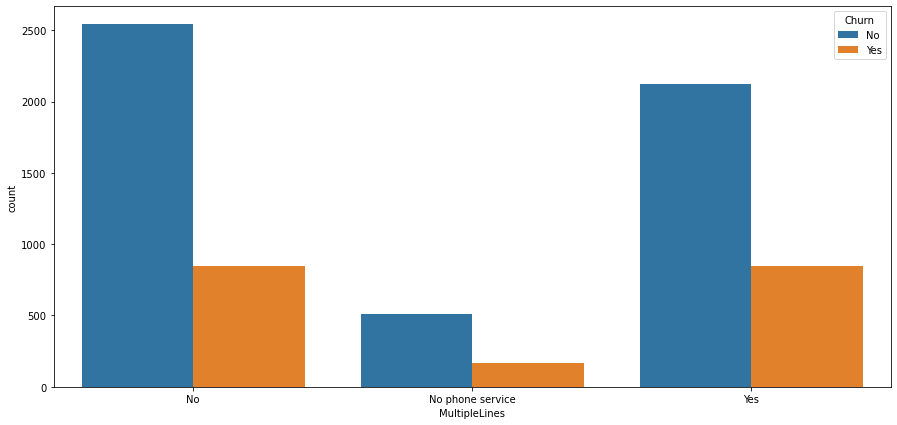

In [41]:
plt.figure(figsize=(15,7))
sns.countplot(df[l[5]],hue=df['Churn'])

<AxesSubplot:xlabel='InternetService', ylabel='count'>

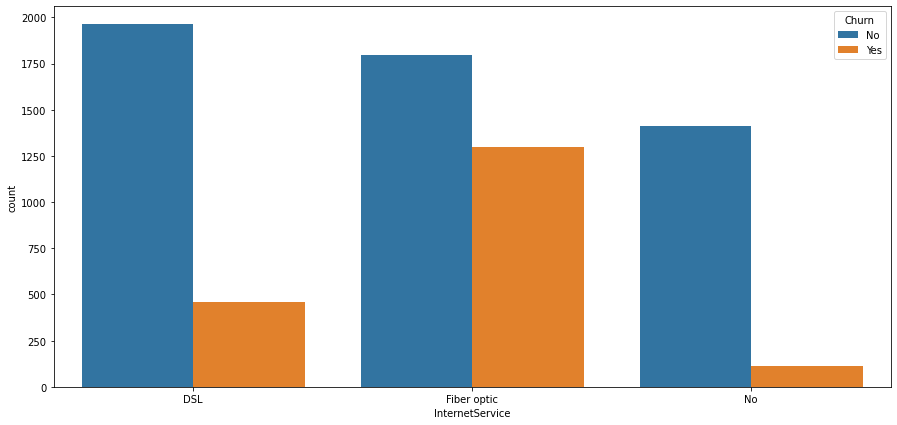

In [42]:
plt.figure(figsize=(15,7))
sns.countplot(df[l[6]],hue=df['Churn'])

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

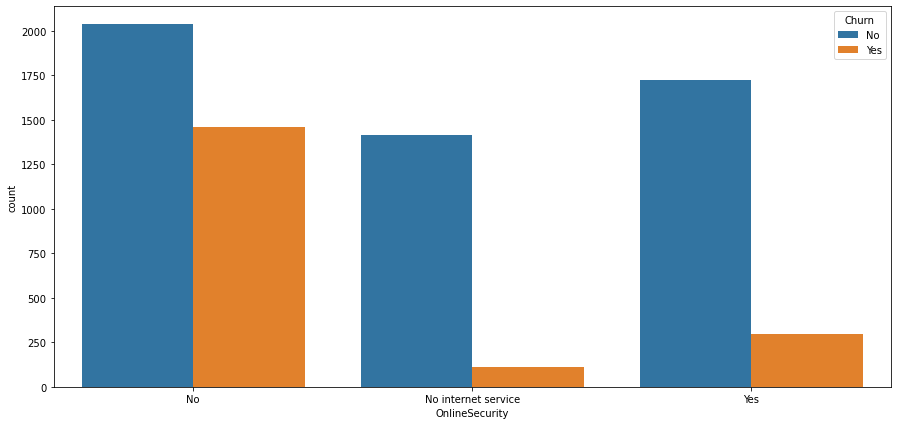

In [43]:
plt.figure(figsize=(15,7))
sns.countplot(df[l[7]],hue=df['Churn'])

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

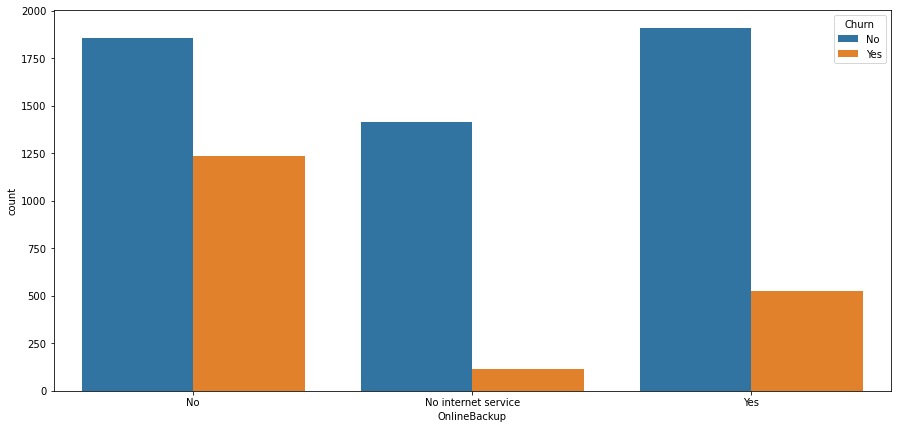

In [44]:
plt.figure(figsize=(15,7))
sns.countplot(df[l[8]],hue=df['Churn'])

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

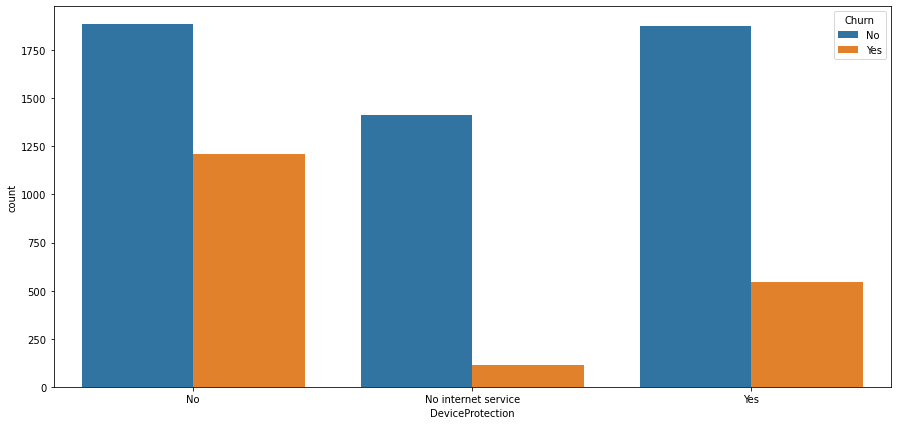

In [45]:
plt.figure(figsize=(15,7))
sns.countplot(df[l[9]],hue=df['Churn'])

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

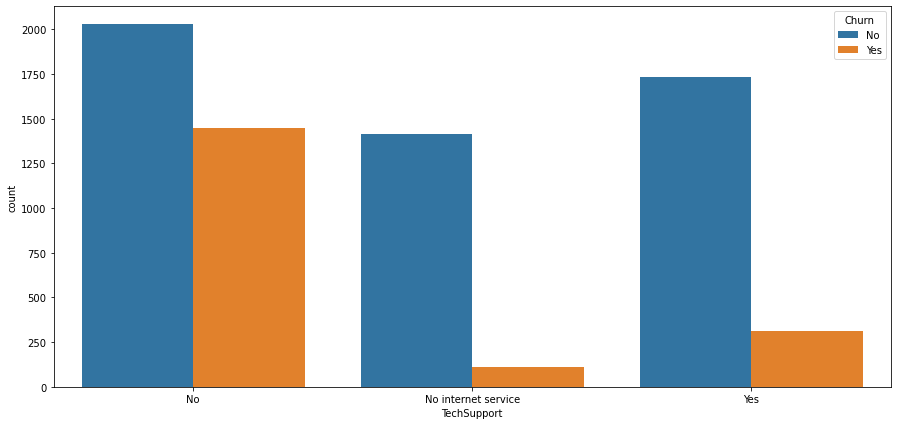

In [46]:
plt.figure(figsize=(15,7))
sns.countplot(df[l[10]],hue=df['Churn'])

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

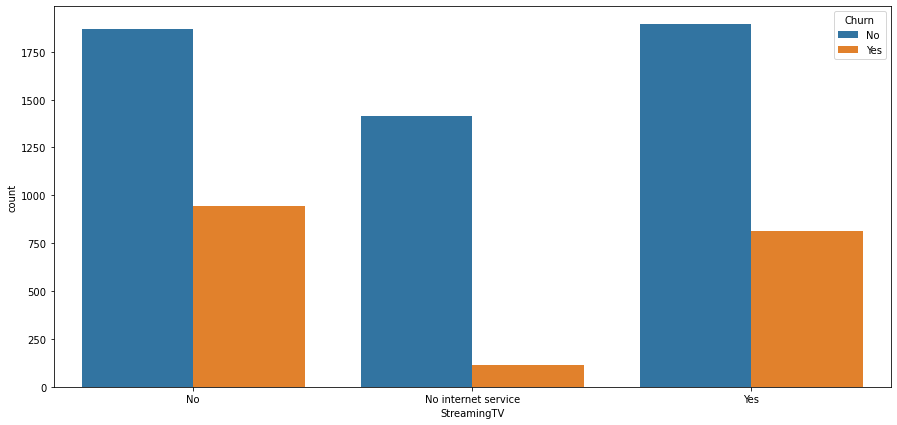

In [47]:
plt.figure(figsize=(15,7))
sns.countplot(df[l[11]],hue=df['Churn'])

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

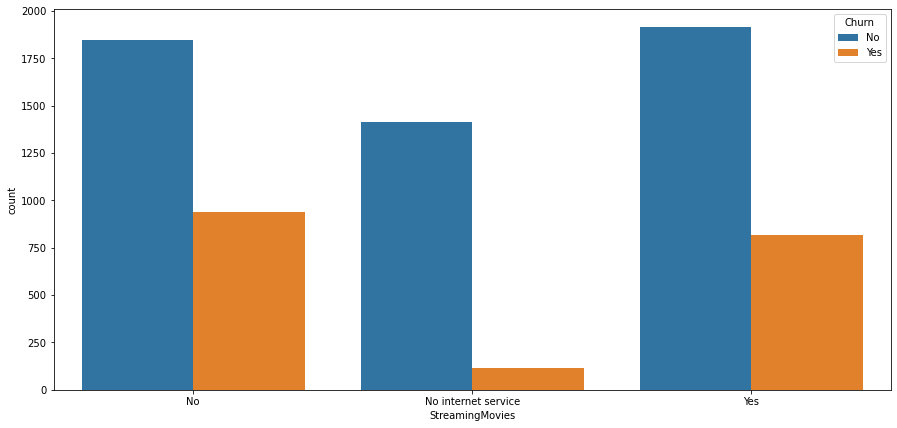

In [48]:
plt.figure(figsize=(15,7))
sns.countplot(df[l[12]],hue=df['Churn'])

<AxesSubplot:xlabel='Contract', ylabel='count'>

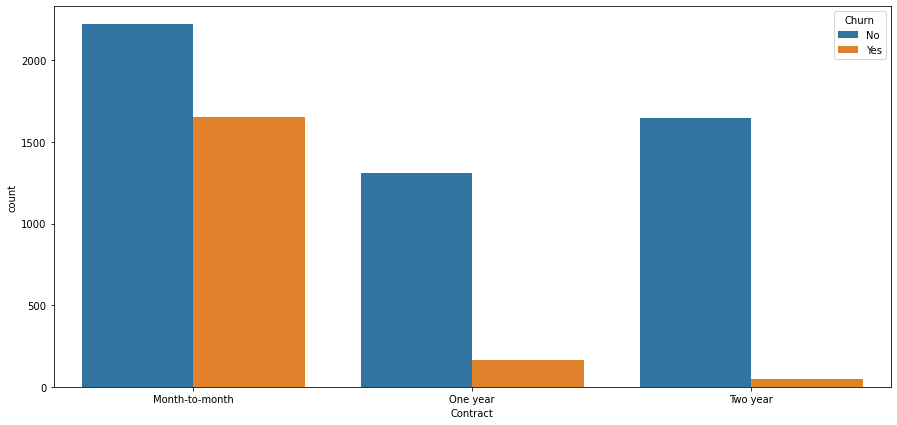

In [49]:
plt.figure(figsize=(15,7))
sns.countplot(df[l[13]],hue=df['Churn'])

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

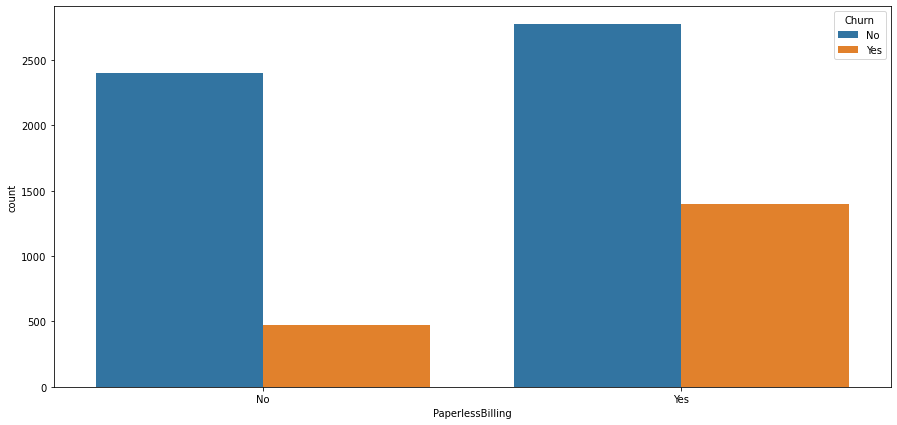

In [50]:
plt.figure(figsize=(15,7))
sns.countplot(df[l[14]],hue=df['Churn'])

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

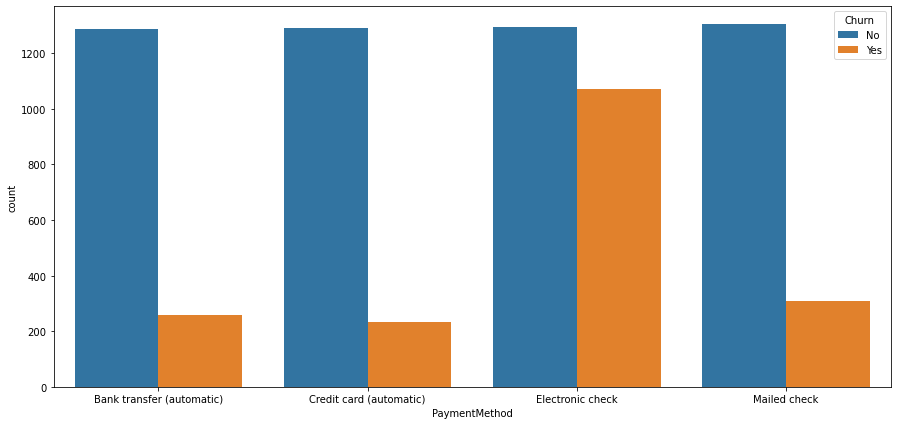

In [51]:
plt.figure(figsize=(15,7))
sns.countplot(df[l[15]],hue=df['Churn'])

#### Conclusion from distribution plots:

We have almost equal no. of males and females.

Gender has almost no impact on the target variable i.e Churn

Almost 50% of the customers have partners.

Almost 30% of the customers have dependants

85% of the customers have phone service

Around 40% customers have multiple lines

for Internet customers prefer Fiber Optics over DSL 

Around 30% have taken online security.Majority of Customer don't have Online security or backup

Close 35% prefer device protection

Majority of Customer don't have Tech Support

Around 37% have registered for Streaming TV & MOvie

Contract - Majority of customers are subscribed for Month to Month contract (55%)

Majority of customers have opted Paperless billing

Most of customers pay eletronic check.40 % f the customers prefer Automatic payment (Bank Transfer and Credit Card)


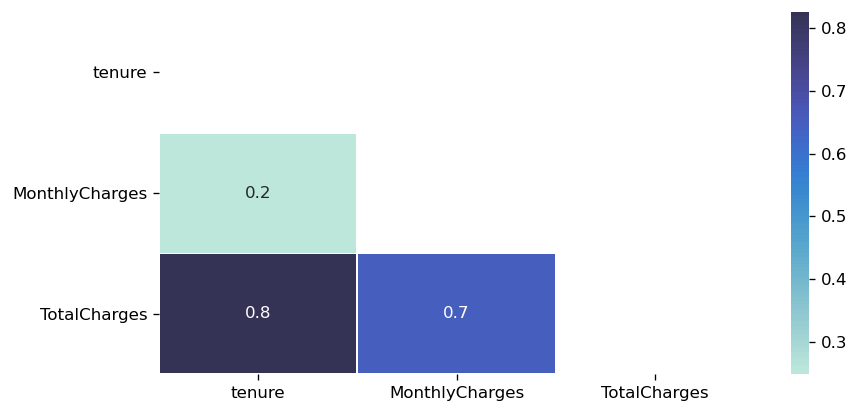

In [52]:
plt.figure(dpi = 120,figsize= (8,4))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), annot=True, mask = mask,linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

Total charges have high linear correlation with tenure and monthly charges

Hypotheis Testing

In [56]:
#Using t-test for continuous features

# Null Hypothesis :Mean value of the feature for customers who churn and customers who did not churn are same.
# Alternate Hypothesis:Mean value of the feature for customers who churn and customers who did not churn are not same.

#col=list(df.select_dtypes(include=['int64','float64']).columns)

for i in li:
    df_0 = df[df['Churn'] == 'No'][i]
    df_1 = df[df['Churn'] == 'Yes'][i]
    t, p_value  = stats.ttest_ind(df_0,df_1, axis = 0,equal_var=False)
    print('P_Value:{}'.format(p_value))
    if p_value < 0.05 :  # Setting our significance level at 5%
        print(' Rejecting Null Hypothesis. This means {} of customers who churn and customers who did not churn are not same'.format(i))
    else:
        print('Fail to Reject Null Hypothesis.This means {} of customers who churn and customers who did not churn are same'.format(i))
    print('\n')

P_Value:1.1954945472607148e-232
 Rejecting Null Hypothesis. This means tenure of customers who churn and customers who did not churn are not same


P_Value:5.902580609072126e-75
 Rejecting Null Hypothesis. This means TotalCharges of customers who churn and customers who did not churn are not same


P_Value:8.592449331547539e-73
 Rejecting Null Hypothesis. This means MonthlyCharges of customers who churn and customers who did not churn are not same




In [57]:
#df[df['Churn'] == 'No']['TotalCharges'].mean() 
df_0 = df[df['Churn'] == 'No']['TotalCharges']
df_1 = df[df['Churn'] == 'Yes']['TotalCharges']
t, p_value  = stats.ttest_ind(df_0,df_1, axis = 0,equal_var=False)
print('P_Value:{}'.format(p_value))

P_Value:5.902580609072126e-75


In [58]:
a=np.array(df[df.Churn == 'No']['TotalCharges'])
b=np.array(df[df.Churn == 'Yes']['TotalCharges'])
t1, p_value1  = stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')

In [59]:
p_value1

2.127211613240394e-63

In [60]:
#Using Chi-Squared Test for categorical features

# Null Hypothesis :Mean value of the feature for customers having loan and customers do not having loan are same.
# Alternate Hypothesis:Mean value of the feature for customers having loan and customers do not having loan are not same.
for i in l[0:-1]:
    table=pd.crosstab(df['Churn'],df[i])
    stat,p_value,dof,expected=stats.chi2_contingency(table)
    print('P_Value:{}'.format(p_value))
    if p_value < 0.05:  # Setting our significance level at 5%
         print(' Rejecting Null Hypothesis. This means {} of customers who churn and customers who did not churn are not same'.format(i))
    else:
        print('Fail to Reject Null Hypothesis.This means {} of customers who churn and customers who did not churn are same'.format(i))
    print('\n')

P_Value:0.48657873605618596
Fail to Reject Null Hypothesis.This means gender of customers who churn and customers who did not churn are same


P_Value:1.510066805092378e-36
 Rejecting Null Hypothesis. This means SeniorCitizen of customers who churn and customers who did not churn are not same


P_Value:2.1399113440759935e-36
 Rejecting Null Hypothesis. This means Partner of customers who churn and customers who did not churn are not same


P_Value:4.9249216612154196e-43
 Rejecting Null Hypothesis. This means Dependents of customers who churn and customers who did not churn are not same


P_Value:0.3387825358066928
Fail to Reject Null Hypothesis.This means PhoneService of customers who churn and customers who did not churn are same


P_Value:0.0034643829548773
 Rejecting Null Hypothesis. This means MultipleLines of customers who churn and customers who did not churn are not same


P_Value:9.571788222840544e-160
 Rejecting Null Hypothesis. This means InternetService of customers who chur

# Data pre-processing
Handling Outliers

In [61]:
for c in li:
    #getting upper lower quartile values
    q1= df[c].quantile(0.25)
    q3 = df[c].quantile(0.75)
    
    IQR=q3-q1 #Interquartile range

    lower=q1-IQR*1.5
    upper=q3+IQR*1.5
    
    Outliers=[i for i in df[c] if i < lower or i > upper]
    print('Number of outliers in {} : {}'.format(c,len(Outliers)))
    print('\n')

    #Calculating mean of the columns ignoring outliers
    
    df_include = df.loc[(df[c] >= lower) & (df[c] <= upper)]
    
    mean=int(df_include[c].mean())
    print('Mean of {} is {}'.format(c,mean))
    print('\n')
    
    #imputing outliers with mean
    
    df[c]=np.where(df[c]>upper,mean,df[c])
    df[c]=np.where(df[c]<lower,mean,df[c])
    Outliers=[i for i in df[c] if i < lower or i > upper]
    
    print('Total Number of outliers in {} after Imputing : {}'.format(c,len(Outliers)))  
    print('\n')

Number of outliers in tenure : 0


Mean of tenure is 32


Total Number of outliers in tenure after Imputing : 0


Number of outliers in TotalCharges : 0


Mean of TotalCharges is 2279


Total Number of outliers in TotalCharges after Imputing : 0


Number of outliers in MonthlyCharges : 0


Mean of MonthlyCharges is 64


Total Number of outliers in MonthlyCharges after Imputing : 0




In [62]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


Mean values are diffeent from median.

One hot encoding of the categorical variables:

In [63]:
oneHotCols=l[0:-1]
df=pd.get_dummies(df, columns=oneHotCols)

In [64]:
df

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,No,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,No,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,Yes,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,No,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,Yes,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,No,0,1,1,0,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,72,103.20,7362.90,No,1,0,1,0,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,11,29.60,346.45,No,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,4,74.40,306.60,Yes,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1


In [65]:
df['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: category
Categories (2, object): ['No', 'Yes']

Checking on Target Imbalance

<AxesSubplot:ylabel='Churn'>

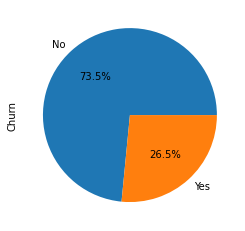

In [66]:
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%')

We can see the percentages of the target variables. Target variables are imbalance

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   tenure                                   7043 non-null   int64   
 1   MonthlyCharges                           7043 non-null   float64 
 2   TotalCharges                             7043 non-null   float64 
 3   Churn                                    7043 non-null   category
 4   gender_Female                            7043 non-null   uint8   
 5   gender_Male                              7043 non-null   uint8   
 6   SeniorCitizen_0                          7043 non-null   uint8   
 7   SeniorCitizen_1                          7043 non-null   uint8   
 8   Partner_No                               7043 non-null   uint8   
 9   Partner_Yes                              7043 non-null   uint8   
 10  Dependents_No                       

In [68]:
#df.drop(columns='TotalCharges',inplace=True)

In [69]:
# Differentiating independent variables and dependent variables
X=df.drop('Churn',axis=1)
y=df['Churn'] 

In [70]:
X.describe()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,0.495244,0.504756,0.837853,0.162147,0.516967,0.483033,0.700412,...,0.387903,0.550192,0.209144,0.240664,0.407781,0.592219,0.219225,0.216101,0.335794,0.228880
std,24.559481,30.090047,2266.794470,0.500013,0.500013,0.368612,0.368612,0.499748,0.499748,0.458110,...,0.487307,0.497510,0.406726,0.427517,0.491457,0.491457,0.413751,0.411613,0.472301,0.420141
min,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,35.500000,398.550000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,70.350000,1394.550000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,89.850000,3786.600000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Applying z score for scaling

In [71]:
#X_Scaled=X.apply(zscore)

In [72]:
#X_Scaled.describe().T

Train test split

In [73]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [74]:
X_train.shape,X_test.shape

((4930, 46), (2113, 46))

In [75]:
#X_train=X_train1.apply(zscore)
#X_test=X_test1.apply(zscore)

# Model training, testing and tuning


In [168]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline

Applying Logistic Regression

In [169]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.8073022312373225
Accuracy on Test data: 0.8021769995267393


In [170]:
acc_LR=logit.score(X_test, y_test)

In [171]:
resultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'accuracy': acc_LR})
resultsDf

,Method,accuracy
0,Logistic Regression,0.802177


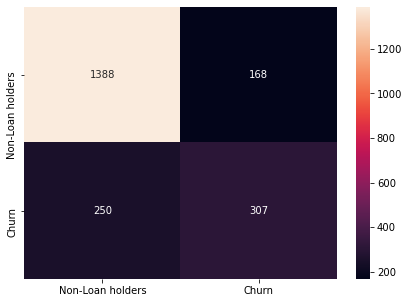

In [172]:
cm = confusion_matrix(y_test, logit_pred, labels=['No', 'Yes'])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Churn"]],
                  columns = [i for i in ["Non-Loan holders","Churn"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [173]:
from sklearn.metrics import classification_report

print("classification  Matrix:\n",classification_report(y_test,logit_pred))

classification  Matrix:
               precision    recall  f1-score   support

          No       0.85      0.89      0.87      1556
         Yes       0.65      0.55      0.59       557

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.80      2113



In [174]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  Restricting the depth of the tree to 5
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [175]:
preds_pruned = clf_pruned.predict(X_test)
preds_pruned_train = clf_pruned.predict(X_train)

In [176]:
print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))

0.7903454803596782
0.7914807302231237


In [177]:
acc_DT = accuracy_score(y_test, preds_pruned)

In [178]:
acc_DT

0.7903454803596782

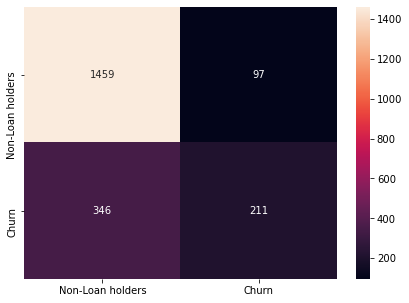

In [179]:
cm = confusion_matrix(y_test, preds_pruned, labels=['No', 'Yes'])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Churn"]],
                  columns = [i for i in ["Non-Loan holders","Churn"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [180]:

print("classification  Matrix:\n",classification_report(y_test,preds_pruned))

classification  Matrix:
               precision    recall  f1-score   support

          No       0.81      0.94      0.87      1556
         Yes       0.69      0.38      0.49       557

    accuracy                           0.79      2113
   macro avg       0.75      0.66      0.68      2113
weighted avg       0.78      0.79      0.77      2113



In [181]:
tempresultsDf1 = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})

In [182]:

#Store the accuracy results for each model in a dataframe for final comparison
#pd.concat([df1, df2], axis=0)
resultsDf = pd.concat([resultsDf, tempresultsDf1],axis=0)

resultsDf

,Method,accuracy
0,Logistic Regression,0.802177
0,Decision Tree,0.790345


Logistic Reg. performs better than Decision Tree both in terms of accuracy and F1 score.

In [183]:
feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(la, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
MonthlyCharges,0.194698
gender,0.150446
SeniorCitizen,0.018920
TotalCharges,0.000000
PaymentMethod,0.000000
PaperlessBilling,0.000000
Contract,0.000000
StreamingMovies,0.000000
StreamingTV,0.000000
TechSupport,0.000000


In [184]:
### Apply the Random forest model and print the accuracy of Random forest Model

from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)

acc_RF


0.7893989588263133

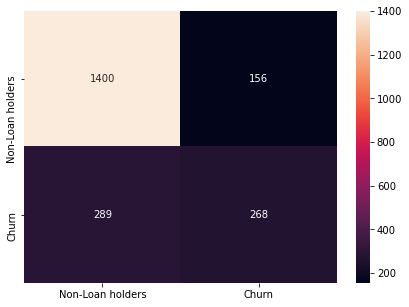

In [185]:
cm = confusion_matrix(y_test, pred_RF, labels=['No', 'Yes'])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Churn"]],
                  columns = [i for i in ["Non-Loan holders","Churn"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [186]:
print("classification  Matrix:\n",classification_report(y_test,pred_RF))

classification  Matrix:
               precision    recall  f1-score   support

          No       0.83      0.90      0.86      1556
         Yes       0.63      0.48      0.55       557

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.70      2113
weighted avg       0.78      0.79      0.78      2113



In [187]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.802177
0,Decision Tree,0.790345
0,Random Forest,0.789399


Compared to the decision tree, we can see that the accuracy has significantly improved for the Random forest model. Logistic Reg. performs better than Random Forest both in terms of accuracy and F1 score.

In [188]:

## Apply Adaboost Ensemble Algorithm for the same data 

from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)


acc_AB

0.8031235210601041

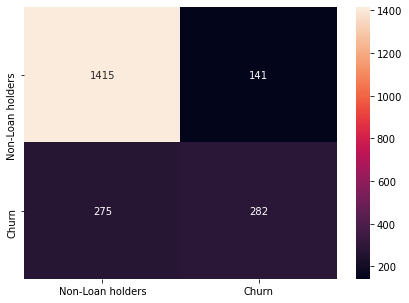

In [189]:
cm = confusion_matrix(y_test, pred_AB, labels=['No', 'Yes'])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Churn"]],
                  columns = [i for i in ["Non-Loan holders","Churn"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [190]:
print("classification  Matrix:\n",classification_report(y_test,pred_AB))

classification  Matrix:
               precision    recall  f1-score   support

          No       0.84      0.91      0.87      1556
         Yes       0.67      0.51      0.58       557

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



In [191]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Logistic Regression,0.802177
0,Decision Tree,0.790345
0,Random Forest,0.789399
0,Adaboost,0.803124


 Adaboost performs better than all above algorithm in terms of accuracy.

In [119]:
# Feature Importance for Adaboost
from sklearn.feature_selection import RFE
features = list(df.columns[1:16])

# Feature Importance for AdaBoostClassifier
adboost_cls = AdaBoostClassifier()
adboost_cls.fit(X_train, y_train)
feature_imp_adboost = np.round(adboost_cls.feature_importances_, 5)
feat_imp_dict = dict(zip(la, feature_imp_adboost))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
Partner,0.34
gender,0.18
SeniorCitizen,0.12
MultipleLines,0.02
MonthlyCharges,0.02
StreamingMovies,0.02
Churn,0.02
InternetService,0.00
OnlineSecurity,0.00
OnlineBackup,0.00


In [192]:

### Apply Bagging Classifier Algorithm 

from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

pred_BG =bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)



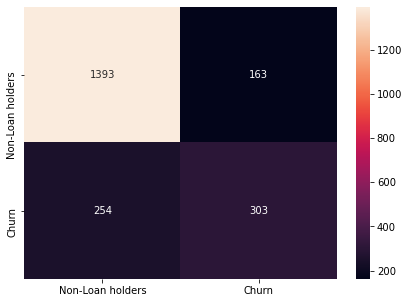

In [193]:
cm = confusion_matrix(y_test, pred_BG, labels=['No', 'Yes'])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Churn"]],
                  columns = [i for i in ["Non-Loan holders","Churn"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [194]:
print("classification  Matrix:\n",classification_report(y_test,pred_BG))

classification  Matrix:
               precision    recall  f1-score   support

          No       0.85      0.90      0.87      1556
         Yes       0.65      0.54      0.59       557

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.80      2113



In [195]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf


,Method,accuracy
0,Logistic Regression,0.802177
0,Decision Tree,0.790345
0,Random Forest,0.789399
0,Adaboost,0.803124
0,Bagging,0.802650


In [212]:
### Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

from sklearn.ensemble import GradientBoostingClassifier
gbcl0 = GradientBoostingClassifier(n_estimators = 20, learning_rate = 0.8, random_state=22)
gbcl0 = gbcl0.fit(X_train, y_train)

pred_GB0 =gbcl0.predict(X_test)
acc_GB0 = accuracy_score(y_test, pred_GB0)
acc_GB0



0.7950780880265026

Changing the hyperparameters:

In [209]:
gbcl1 = GradientBoostingClassifier(n_estimators = 40, learning_rate = 0.1, random_state=12)
gbcl1 = gbcl1.fit(X_train, y_train)

pred_GB1 =gbcl1.predict(X_test)
acc_GB1 = accuracy_score(y_test, pred_GB1)
acc_GB1


0.8045433033601515

In [208]:

from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

pred_GB =gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)
acc_GB



0.807382867960246

Best model among all.

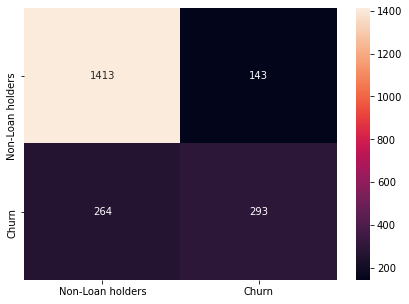

In [197]:
cm = confusion_matrix(y_test, pred_GB, labels=['No', 'Yes'])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Churn"]],
                  columns = [i for i in ["Non-Loan holders","Churn"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [201]:
print("classification  Matrix:\n",classification_report(y_test,pred_GB))

classification  Matrix:
               precision    recall  f1-score   support

          No       0.84      0.91      0.87      1556
         Yes       0.67      0.53      0.59       557

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113



In [199]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf



,Method,accuracy
0,Logistic Regression,0.802177
0,Decision Tree,0.790345
0,Random Forest,0.789399
0,Adaboost,0.803124
0,Bagging,0.802650
0,Gradient Boost,0.807383


Adaboost,Bagging,Gradient Boost,Logistic Reg. have comparative performance both in terms of accuracy and F1 score. Gradient Boost have best performance among them.

In [214]:
#Pickling of seleced model
import pickle    

Model = pickle.dumps(gbcl)  


# Conclusion and improvisation


All the features except Gender have some effect on target variables.

Numerical variables are not normally distributed.

Gradient Boost have best performance. Other modelsAdaboost,Bagging,Gradient Boost,Logistic Reg. are also giving good performance comparative both in terms of accuracy and F1 score.

No. ofsenior citizens are very less.

Around 85% of the customers have phone service.

Around 40% customers have multiple lines.

For Internet customers prefer Fiber Optics over DSL. 


# GUI

In [215]:


import pickle    

Model = pickle.dumps(gbcl)  

import tkinter as tk

from tkinter import ttk
result=''

win = tk.Tk()

win.title('Churn Prediction') 

#				tenure	PhoneService	MultipleLines	InternetService	OnlineSecurity	
#OnlineBackup	DeviceProtection
#TechSupport	StreamingTV	StreamingMovies	Contract	PaperlessBilling	PaymentMethod	MonthlyCharges	TotalCharges	Churn

#Column 1 
c1=ttk.Label(win,text="gender")
c1.grid(row=0,column=0,sticky=tk.W)
var1=tk.StringVar()
c1_entrybox=ttk.Entry(win,width=16,textvariable=var1)
c1_entrybox.grid(row=0,column=1)
#Column 2
c2=ttk.Label(win,text="SeniorCitizen")
c2.grid(row=1,column=0,sticky=tk.W)
var2=tk.StringVar()
c2_entrybox=ttk.Entry(win,width=16,textvariable=var2)
c2_entrybox.grid(row=1,column=1)
#Column 3
c3=ttk.Label(win,text="Partner")
c3.grid(row=2,column=0,sticky=tk.W)
var3=tk.StringVar()
c3_entrybox=ttk.Entry(win,width=16,textvariable=var3)
c3_entrybox.grid(row=2,column=1)
#Column 4
c4=ttk.Label(win,text="Dependents")
c4.grid(row=3,column=0,sticky=tk.W)
var4=tk.StringVar()
c4_entrybox=ttk.Entry(win,width=16,textvariable=var4)
c4_entrybox.grid(row=3,column=1)
#Column 5
c5=ttk.Label(win,text="tenure")
c5.grid(row=4,column=0,sticky=tk.W)
var5=tk.StringVar()
c5_entrybox=ttk.Entry(win,width=16,textvariable=var5)
c5_entrybox.grid(row=4,column=1)
#Column 6
c6=ttk.Label(win,text="PhoneService")
c6.grid(row=5,column=0,sticky=tk.W)
var6=tk.StringVar()
c6_entrybox=ttk.Entry(win,width=16,textvariable=var6)
c6_entrybox.grid(row=5,column=1)
#Column 7
c7=ttk.Label(win,text="InternetService")
c7.grid(row=6,column=0,sticky=tk.W)
var7=tk.StringVar()
c7_entrybox=ttk.Entry(win,width=16,textvariable=var7)
c7_entrybox.grid(row=6,column=1)
#Column 8
c8=ttk.Label(win,text="OnlineSecurity")
c8.grid(row=7,column=0,sticky=tk.W)
var8=tk.StringVar()
c8_entrybox=ttk.Entry(win,width=16,textvariable=var8)
c8_entrybox.grid(row=7,column=1)

c9=ttk.Label(win,text="OnlineBackup")
c9.grid(row=8,column=0,sticky=tk.W)
var9=tk.StringVar()
c9_entrybox=ttk.Entry(win,width=16,textvariable=var9)
c9_entrybox.grid(row=8,column=1)

c10=ttk.Label(win,text="DeviceProtection")
c10.grid(row=9,column=0,sticky=tk.W)
var10=tk.StringVar()
c10_entrybox=ttk.Entry(win,width=16,textvariable=var10)
c10_entrybox.grid(row=9,column=1)

c11=ttk.Label(win,text="TechSupport")
c11.grid(row=10,column=0,sticky=tk.W)
var11=tk.StringVar()
c11_entrybox=ttk.Entry(win,width=16,textvariable=var11)
c11_entrybox.grid(row=10,column=1)

c12=ttk.Label(win,text="StreamingTV")
c12.grid(row=11,column=0,sticky=tk.W)
var12=tk.StringVar()
c12_entrybox=ttk.Entry(win,width=16,textvariable=var12)
c12_entrybox.grid(row=11,column=1)

c13=ttk.Label(win,text="StreamingMovie")
c13.grid(row=12,column=0,sticky=tk.W)
var13=tk.StringVar()
c13_entrybox=ttk.Entry(win,width=16,textvariable=var13)
c13_entrybox.grid(row=12,column=1)
                  
c14=ttk.Label(win,text="Contract")
c14.grid(row=13,column=0,sticky=tk.W)
var14=tk.StringVar()
c14_entrybox=ttk.Entry(win,width=16,textvariable=var14)
c14_entrybox.grid(row=13,column=1)
 
c15=ttk.Label(win,text="PaperlessBilling")
c15.grid(row=14,column=0,sticky=tk.W)
var15=tk.StringVar()
c15_entrybox=ttk.Entry(win,width=16,textvariable=var15)
c15_entrybox.grid(row=14,column=1)
                  
c16=ttk.Label(win,text="PaymentMethod")
c16.grid(row=15,column=0,sticky=tk.W)
var16=tk.StringVar()
c16_entrybox=ttk.Entry(win,width=16,textvariable=var16)
c16_entrybox.grid(row=15,column=1)
                  
c17=ttk.Label(win,text="MonthlyCharges")
c17.grid(row=16,column=0,sticky=tk.W)
var17=tk.StringVar()
c17_entrybox=ttk.Entry(win,width=16,textvariable=var17)
c17_entrybox.grid(row=16,column=1)
                  
c18=ttk.Label(win,text="TotalCharges")
c18.grid(row=17,column=0,sticky=tk.W)
var18=tk.StringVar()
c18_entrybox=ttk.Entry(win,width=16,textvariable=var18)
c18_entrybox.grid(row=17,column=1)
                  

                                    
import pandas as pd
DF = pd.DataFrame()
def action():
    global DB
    import pandas as pd
    DF = pd.DataFrame(columns=la)
    v1=var1.get()
    DF.loc[0,la[0]]=v1
    v2=var2.get()
    DF.loc[0,la[1]]=v2
    v3=var3.get()
    DF.loc[0,la[2]]=v3
    v4=var4.get()
    DF.loc[0,la[3]]=v4
    v5=var5.get()
    DF.loc[0,la[4]]=v5
    v6=var6.get()
    DF.loc[0,la[5]]=v6
    v7=var7.get()
    DF.loc[0,la[6]]=v7
    v8=var8.get()
    DF.loc[0,la[7]]=v8
    v9=var9.get()
    DF.loc[0,la[8]]=v9
    v10=var10.get()
    DF.loc[0,la[9]]=v10
    v11=var11.get()
    DF.loc[0,la[10]]=v11
    v12=var12.get()

    
    DF.loc[0,la[11]]=v12
    v13=var13.get()
    DF.loc[0,la[12]]=v13
    v14=var14.get()
    DF.loc[0,la[13]]=v14
    v15=var15.get()
    DF.loc[0,la[14]]=v15
    v16=var16.get()
    DF.loc[0,la[15]]=v16
    v17=var17.get()
    DF.loc[0,la[16]]=v17
    
    
print(DF.shape)
DB=DF
print(DB)
def Output():
    for b in l:
        DB["b"] = pd.Categorical(DB["b"])
    for c in li:                               
        DB["c"] = pd.to_numeric(DB["c"])
    
    output=model.predict(DB)
    if output=='No':
        result='Non-Churn'
    elif output=='Yes':
        result='Churn'


Predict_entrybox=ttk.Entry(win,width=16)
Predict_entrybox.grid(row=20,column=1)
Predict_entrybox.insert(1,str(result))
Predict_button=ttk.Button(win,text="Predict",command=Output)
Predict_button.grid(row=20,column=0)
win.mainloop()




(0, 0)
Empty DataFrame
Columns: []
Index: []
